In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.colors as mcolors
from MLP import mlp_training

In [2]:
# toy data
toy_inputs_df = pd.DataFrame({'x': range(1, 11)})

np.random.seed(0)
min_log_lambda = np.random.normal(loc=range(10), scale=1.5, size=10)
max_log_lambda = np.random.normal(loc=range(2, 12), scale=1.5, size=10)
toy_outputs_df = pd.DataFrame({'min.log.lambda': min_log_lambda, 'max.log.lambda': max_log_lambda})

# train model
identity = lambda x: x
toy_model, _ = mlp_training(
    inputs_df = toy_inputs_df, 
    outputs_df = toy_outputs_df, 
    hidden_layers = 0, 
    hidden_size = 100, 
    chosen_feature = ['x'], 
    f_engineer = [identity],
    normalize = 0,
    batch_size = 1,
    margin = 0.0,
    n_ites = 5000,
    lr = 0.001,
    patience = 100,
    verbose = 1,
    epoch_step = 200)

0, loss: 36.7954216003418
200, loss: 0.7146639823913574
400, loss: 0.3394741415977478
600, loss: 0.27707669138908386
800, loss: 0.2451612949371338
1000, loss: 0.24353107810020447
1200, loss: 0.24336712062358856
Stopping early at epoch 1340, loss: 0.2432049959897995


In [3]:
toy_model_2, _ = mlp_training(
    inputs_df = toy_inputs_df, 
    outputs_df = toy_outputs_df, 
    hidden_layers = 0, 
    hidden_size = 100, 
    chosen_feature = ['x'], 
    f_engineer = [identity],
    normalize = 0,
    batch_size = 10,
    margin = 0.0,
    n_ites = 10000,
    lr = 0.001,
    patience = 100,
    verbose = 1,
    epoch_step = 1000)

0, loss: 37.497135162353516
1000, loss: 2.541672468185425
2000, loss: 0.5194324254989624
3000, loss: 0.38420969247817993
4000, loss: 0.33530324697494507
5000, loss: 0.2837367653846741
6000, loss: 0.24586331844329834
7000, loss: 0.243404358625412
8000, loss: 0.24314813315868378
Stopping early at epoch 8243, loss: 0.24315676093101501


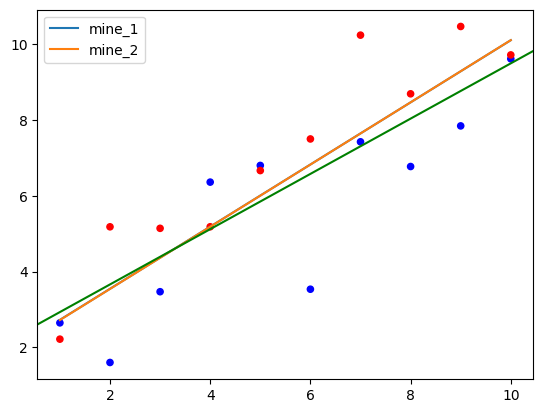

In [4]:
# Generating random points for two classes
X1 = pd.concat([toy_inputs_df['x'], toy_outputs_df['min.log.lambda']], axis=1).rename(columns={'min.log.lambda': 'y'})
X2 = pd.concat([toy_inputs_df['x'], toy_outputs_df['max.log.lambda']], axis=1).rename(columns={'max.log.lambda': 'y'})
X = pd.concat([X1, X2]).to_numpy()

y = [0] * 10 + [1] * 10

# Create SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Plotting the points
colors = ['blue', 'red', 'red'] 
cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom', colors)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap_custom)

# Plotting the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.plot(toy_inputs_df['x'].to_numpy(),   toy_model(torch.Tensor(toy_inputs_df['x']).reshape(-1,1)).detach().numpy().reshape(-1), label='mine_1')
plt.plot(toy_inputs_df['x'].to_numpy(), toy_model_2(torch.Tensor(toy_inputs_df['x']).reshape(-1,1)).detach().numpy().reshape(-1), label='mine_2')
ax.contour(XX, YY, Z, colors='green', levels=[0], alpha=1, linestyles=['-'])
plt.legend()
plt.show()